In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()

#maths
import math

#set the options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
%matplotlib inline

# Importing Raw Data From Source Files

In [2]:
rev1= pd.read_csv('Revenue Data 1.csv')
rev2=pd.read_csv('Revenue Data 2.csv')
m_data=pd.read_csv('Marketing Data.csv')
v_data=pd.read_excel('Visitors Data.xlsx')

# Raw Data Inspection & Cleaning

In [3]:
display(rev1, rev2, m_data, v_data)

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020,Friday,10000.0
5,14/11/2020,34.0,11.0,11.0,2020,Saturday,12996.0
6,15/11/2020,35.0,11.0,11.0,2020,Sunday,11929.0
7,16/11/2020,35.0,11.0,11.0,2020,Monday,5359.0
8,17/11/2020,35.0,11.0,11.0,2020,Tuesday,12016.0
9,18/11/2020,35.0,11.0,11.0,2020,Wednesday,7441.0


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,18/03/2021,53.0,3.0,15.0,2021.0,Thursday,14909.0
1,19/03/2021,53.0,3.0,15.0,2021.0,Friday,5903.0
2,20/03/2021,53.0,3.0,15.0,2021.0,Saturday,4169.0
3,21/03/2021,54.0,3.0,15.0,2021.0,Sunday,9486.0
4,22/03/2021,54.0,3.0,15.0,2021.0,Monday,9209.0
5,23/03/2021,54.0,3.0,15.0,2021.0,Tuesday,11494.0
6,24/03/2021,54.0,3.0,15.0,2021.0,Wednesday,15190.0
7,25/03/2021,54.0,3.0,15.0,2021.0,Thursday,11524.0
8,26/03/2021,54.0,3.0,15.0,2021.0,Friday,22587.0
9,27/03/2021,54.0,3.0,15.0,2021.0,Saturday,3181.0


,Date,Marketing Spend,Promo
0,09/11/2020,651.375000,No Promo
1,10/11/2020,1298.250000,Promotion Red
2,11/11/2020,1559.375000,Promotion Blue
3,12/11/2020,1801.750000,No Promo
4,13/11/2020,2614.500000,No Promo
5,14/11/2020,1444.000000,Promotion Blue
6,15/11/2020,1325.444444,Promotion Blue
7,16/11/2020,1119.111111,No Promo
8,17/11/2020,1092.363636,Promotion Blue
9,18/11/2020,906.700000,No Promo


,Date,Visitors
0,2020-11-09,707.0
1,2020-11-10,1455.0
2,2020-11-11,1520.0
3,2020-11-12,1726.0
4,2020-11-13,2134.0
5,2020-11-14,1316.0
6,2020-11-15,1287.0
7,2020-11-16,1548.0
8,2020-11-17,1448.0
9,2020-11-18,NaN


In [4]:
display(rev1.head(), rev2.head())

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020,Friday,10000.0


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,18/03/2021,53.0,3.0,15.0,2021.0,Thursday,14909.0
1,19/03/2021,53.0,3.0,15.0,2021.0,Friday,5903.0
2,20/03/2021,53.0,3.0,15.0,2021.0,Saturday,4169.0
3,21/03/2021,54.0,3.0,15.0,2021.0,Sunday,9486.0
4,22/03/2021,54.0,3.0,15.0,2021.0,Monday,9209.0


In [5]:
display(rev1.tail(), rev2.tail())

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
128,17/03/2021,53.0,3.0,15.0,2021,Wednesday,1245.0
129,18/03/2021,NaN,NaN,NaN,2021,NaN,NaN
130,19/03/2021,NaN,NaN,NaN,2021,NaN,NaN
131,20/03/2021,NaN,NaN,NaN,2021,NaN,NaN
132,21/03/2021,NaN,NaN,NaN,2021,NaN,NaN


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
51,08/05/2021,60.0,5.0,17.0,2021.0,Saturday,5927.0
52,09/05/2021,61.0,5.0,17.0,2021.0,Sunday,3861.0
53,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN
54,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN
55,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rev1=rev1.head(129)

In [7]:
rev2=rev2.head(53)

In [8]:
display(m_data.head(), m_data.tail(), v_data.head(), v_data.tail()) #shows the first five & last five observations

,Date,Marketing Spend,Promo
0,09/11/2020,651.375,No Promo
1,10/11/2020,1298.250,Promotion Red
2,11/11/2020,1559.375,Promotion Blue
3,12/11/2020,1801.750,No Promo
4,13/11/2020,2614.500,No Promo


,Date,Marketing Spend,Promo
180,08/05/2021,1121.875,No Promo
181,09/05/2021,871.000,No Promo
182,10/05/2021,NaN,NaN
183,11/05/2021,NaN,NaN
184,12/05/2021,NaN,NaN


,Date,Visitors
0,2020-11-09,707.0
1,2020-11-10,1455.0
2,2020-11-11,1520.0
3,2020-11-12,1726.0
4,2020-11-13,2134.0


,Date,Visitors
180,2021-05-08,1483.0
181,2021-05-09,1303.0
182,2021-05-10,NaN
183,2021-05-11,NaN
184,2021-05-12,NaN


In [9]:
merg1=rev1.append(rev2, ignore_index=True)
merg1

C:\Users\nenbon\AppData\Local\Temp\ipykernel_1984\3906381412.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merg1=rev1.append(rev2, ignore_index=True)


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0
5,14/11/2020,34.0,11.0,11.0,2020.0,Saturday,12996.0
6,15/11/2020,35.0,11.0,11.0,2020.0,Sunday,11929.0
7,16/11/2020,35.0,11.0,11.0,2020.0,Monday,5359.0
8,17/11/2020,35.0,11.0,11.0,2020.0,Tuesday,12016.0
9,18/11/2020,35.0,11.0,11.0,2020.0,Wednesday,7441.0


In [10]:
merg1=merg1.head(186)

In [11]:
merg2=merg1.merge(m_data, how='outer')
merg2

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250000,Promotion Red
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375000,Promotion Blue
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750000,No Promo
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500000,No Promo
5,14/11/2020,34.0,11.0,11.0,2020.0,Saturday,12996.0,1444.000000,Promotion Blue
6,15/11/2020,35.0,11.0,11.0,2020.0,Sunday,11929.0,1325.444444,Promotion Blue
7,16/11/2020,35.0,11.0,11.0,2020.0,Monday,5359.0,1119.111111,No Promo
8,17/11/2020,35.0,11.0,11.0,2020.0,Tuesday,12016.0,1092.363636,Promotion Blue
9,18/11/2020,35.0,11.0,11.0,2020.0,Wednesday,7441.0,906.700000,No Promo


In [12]:
merg2=merg2.head(186)

In [13]:
display(merg2.info(), v_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             185 non-null    object 
 1   Week_ID          182 non-null    float64
 2   Month Number     182 non-null    float64
 3   Month_ID         182 non-null    float64
 4   Year             182 non-null    float64
 5   Day_Name         182 non-null    object 
 6   Revenue          178 non-null    float64
 7   Marketing Spend  178 non-null    float64
 8   Promo            182 non-null    object 
dtypes: float64(6), object(3)
memory usage: 14.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      185 non-null    datetime64[ns]
 1   Visitors  177 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usag

None

None

In [14]:
import warnings
import dateutil
#importing libraries for time format

In [15]:
merg2['Date']=pd.to_datetime(merg2['Date'], format='%d/%m/%Y')
                                        
merg2['Date'].dtype
#To convert the datatype of year in revmar_merged dataset to datetime(i.e day,month, year format)

dtype('<M8[ns]')

In [16]:
merg3=merg2.merge(v_data) #a dataset consisting of all the datasets completely merged and ready for proper analysis
merg3

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250000,Promotion Red,1455.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375000,Promotion Blue,1520.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750000,No Promo,1726.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500000,No Promo,2134.0
5,2020-11-14,34.0,11.0,11.0,2020.0,Saturday,12996.0,1444.000000,Promotion Blue,1316.0
6,2020-11-15,35.0,11.0,11.0,2020.0,Sunday,11929.0,1325.444444,Promotion Blue,1287.0
7,2020-11-16,35.0,11.0,11.0,2020.0,Monday,5359.0,1119.111111,No Promo,1548.0
8,2020-11-17,35.0,11.0,11.0,2020.0,Tuesday,12016.0,1092.363636,Promotion Blue,1448.0
9,2020-11-18,35.0,11.0,11.0,2020.0,Wednesday,7441.0,906.700000,No Promo,NaN


In [17]:
merg3=merg3.head(182)

In [18]:
merg3.shape

(182, 10)

In [19]:
merg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             182 non-null    datetime64[ns]
 1   Week_ID          182 non-null    float64       
 2   Month Number     182 non-null    float64       
 3   Month_ID         182 non-null    float64       
 4   Year             182 non-null    float64       
 5   Day_Name         182 non-null    object        
 6   Revenue          178 non-null    float64       
 7   Marketing Spend  178 non-null    float64       
 8   Promo            182 non-null    object        
 9   Visitors         177 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 15.6+ KB


In [20]:
merg3.isna().sum()

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            4
Marketing Spend    4
Promo              0
Visitors           5
dtype: int64

In [21]:
merg3.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,707.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,1455.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,1520.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,1726.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2134.0


In [22]:
merg3.isna().sum()

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            4
Marketing Spend    4
Promo              0
Visitors           5
dtype: int64

In [23]:
## Outlier treatment

def remove_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    outliers = df[((df<lower_limit) | (df>upper_limit))]
    
    df[df > upper_limit] = upper_limit
    df[df < lower_limit] = lower_limit
        
    return lower_limit,upper_limit,outliers 

In [24]:
display(remove_outliers(merg3['Revenue']),
remove_outliers(merg3.Visitors))

C:\Users\nenbon\AppData\Local\Temp\ipykernel_6008\3627729431.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df > upper_limit] = upper_limit
C:\Users\nenbon\AppData\Local\Temp\ipykernel_6008\3627729431.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df < lower_limit] = lower_limit


(-4615.5,
 23504.5,
 47     36283.0
 74     24417.0
 101    24247.0
 109    26608.0
 122    25704.0
 124    28196.0
 151    23870.0
 164    24506.0
 Name: Revenue, dtype: float64)

(276.5,
 3080.5,
 59    4139.0
 Name: Visitors, dtype: float64)

<AxesSubplot:>

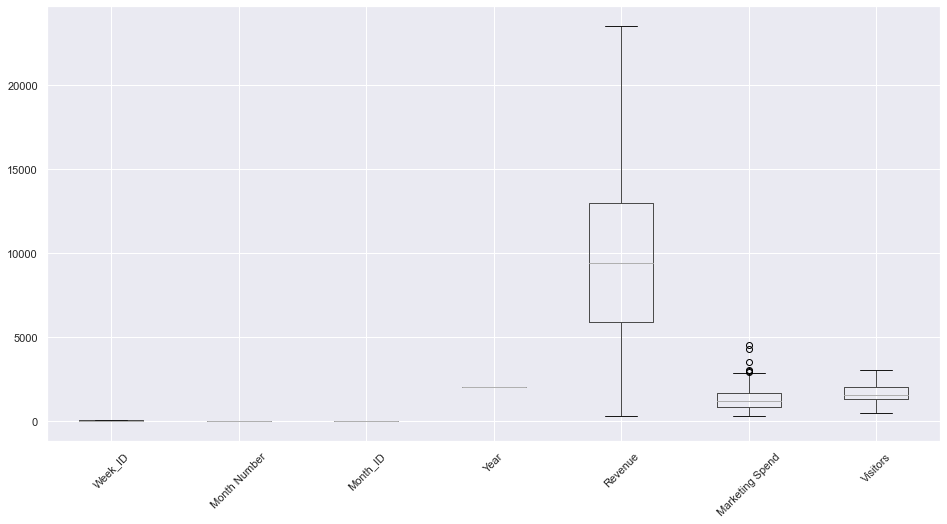

In [25]:
merg3.boxplot(rot=45, figsize=(16,8))

In [26]:
merg3=merg3.copy()
merg3=merg3.copy()

In [27]:
categorical=[col for col in merg3.columns if merg3[col].dtypes=='O'] # a function designed to fetch categorical variables only
categorical

['Day_Name', 'Promo']

In [28]:
for col in categorical:              # a function which displays the different levels of categorical factors
    print(col)
    print(merg3[col].unique())
    print(merg3[col].nunique())   
    print('\n')

Day_Name
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
7


Promo
['No Promo' 'Promotion Red' 'Promotion Blue']
3




# Exploratory Data Analysis

In [37]:
merg3.describe() # a summary statistics of the key parameters of interest

,Week_ID,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors
count,182.000000,182.000000,182.000000,182.000000,178.000000,178.000000,177.000000
mean,47.351648,5.269231,13.774725,2020.708791,10326.219101,1395.744352,1655.635593
std,7.892053,4.204580,1.783540,0.455573,5679.889814,697.677618,479.321927
min,34.000000,1.000000,11.000000,2020.000000,292.000000,322.000000,488.000000
25%,40.000000,2.000000,12.000000,2020.000000,5929.500000,880.281250,1328.000000
50%,48.000000,4.000000,14.000000,2021.000000,9389.000000,1192.750000,1544.000000
75%,54.000000,11.000000,15.000000,2021.000000,12959.500000,1676.450000,2029.000000
max,61.000000,12.000000,17.000000,2021.000000,23504.500000,4535.375000,3080.500000


In [30]:
x=merg3['Marketing Spend']
y=merg3['Revenue']

C:\Users\nenbon\AppData\Local\Temp\ipykernel_6008\2246085758.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "Bbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('scatterplot.png',Bbox_inches='tight')


Text(9.875, 0.5, 'Revenue')

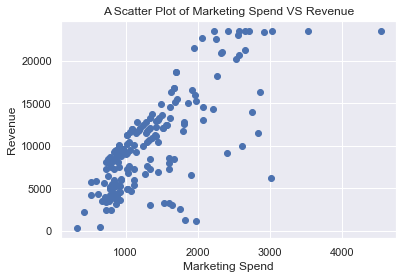

In [31]:
plt.scatter(x,y)
plt.title('A Scatter Plot of Marketing Spend VS Revenue')
plt.xlabel('Marketing Spend')
plt.savefig('scatterplot.png',Bbox_inches='tight')
plt.ylabel('Revenue')

Text(16.0, 0.5, 'Revenue')

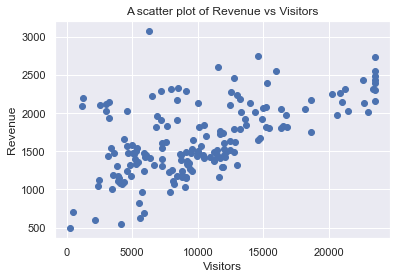

In [202]:

plt.scatter(x='Revenue',y='Visitors',data=merg3)
plt.savefig('scatplot.png', bbox_inches='tight')
plt.title('A scatter plot of Revenue vs Visitors')

plt.xlabel('Visitors')
plt.ylabel('Revenue')

Text(0, 0.5, 'P')

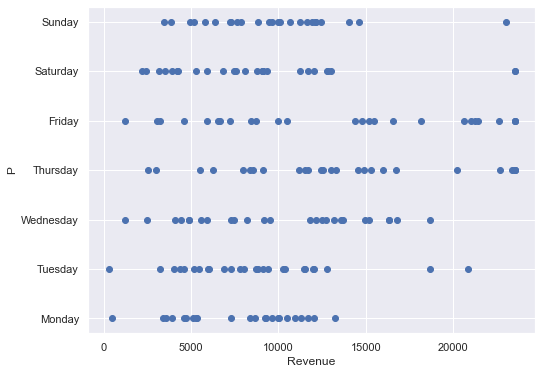

In [203]:
plt.figure(figsize=(8,6),facecolor=('w'))
plt.scatter(x='Revenue',y='Day_Name',data=merg3)

plt.xlabel('Revenue')
plt.ylabel('P')

In [204]:
pro=merg3['Promo'].value_counts().to_frame().reset_index()  #gives a frequency distribution of the promo campaign
pro.columns=('types', 'counts')
pro

,types,counts
0,No Promo,74
1,Promotion Red,54
2,Promotion Blue,54


In [205]:
x=pro['types']
y=pro['counts']

<AxesSubplot:title={'center':'marketig Spend Distribution'}, xlabel='Marketing Spend', ylabel='counts'>

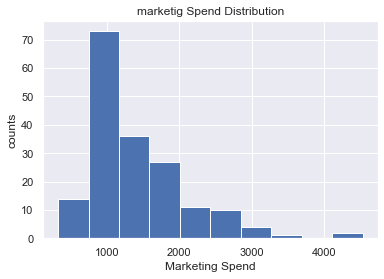

In [206]:
plt.savefig('histogram.png')
plt.ylabel('counts')
plt.xlabel('Marketing Spend')
plt.title('marketig Spend Distribution')
merg3['Marketing Spend'].hist() #this helps reveal some extreme values present in marketing spend

<AxesSubplot:title={'center':'Revenue Distribution'}, xlabel='Revenue', ylabel='counts'>

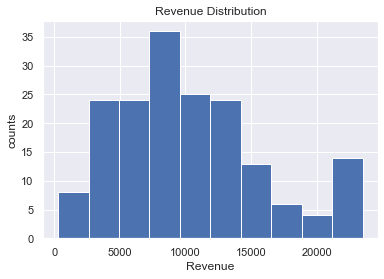

In [207]:
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('counts')
merg3['Revenue'].hist() #this is relatively normally distributed about the the mean

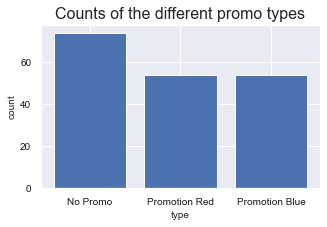

In [208]:
#the distribution of the different promotion campaign adopted, No Promo is the higest of them
plt.figure(figsize=(5,3))          
plt.bar(pro['types'],pro['counts'], color='b')
plt.xlabel("type",fontsize=10 )
plt.ylabel("count", fontsize=10)
plt.xticks(c='k', fontsize=10)
plt.yticks(c="k", fontsize=10)
plt.title("Counts of the different promo types", fontsize=16)
plt.savefig('bar.png')


In [209]:
days=merg3['Day_Name'].value_counts() # Day name is uniformly distributed 
days

Monday       26
Tuesday      26
Wednesday    26
Thursday     26
Friday       26
Saturday     26
Sunday       26
Name: Day_Name, dtype: int64

In [210]:
Months=merg3['Month Number'].value_counts().to_frame().reset_index()
Months.columns=('Months no', 'Counts')
Months

,Months no,Counts
0,12.0,31
1,1.0,31
2,3.0,31
3,4.0,30
4,2.0,28
5,11.0,22
6,5.0,9


In [211]:
x=Months['Months no']
y=Months['Counts']

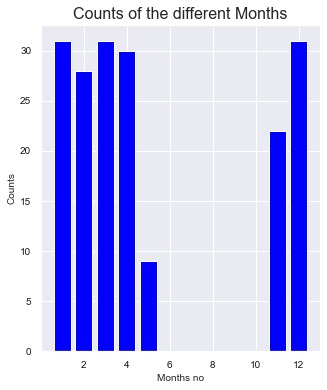

In [212]:
plt.figure(figsize=(5,6))
plt.bar(Months['Months no'],Months['Counts'], color='blue')
plt.xlabel("Months no",fontsize=10 )
plt.ylabel("Counts", fontsize=10)
plt.xticks(c='k', fontsize=10)
plt.yticks(c="k", fontsize=10)
plt.title("Counts of the different Months", fontsize=16)

plt.show()

In [213]:
merg3.groupby('Promo')['Visitors'].sum().to_frame() #individual average distribution of promo type

,Visitors
Promo,
No Promo,114781.5
Promotion Blue,94031.0
Promotion Red,84235.0


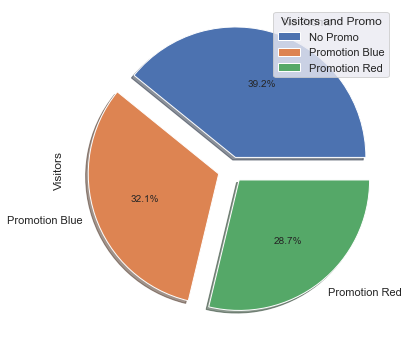

In [214]:
#a visualization of percent distribution of promo types
plt.subplots(figsize=(6,6))
merg3.groupby('Promo')['Visitors'].sum().plot.pie(shadow= True, explode=[0.1,0.1,0.1], autopct='%1.1f%%')
plt.legend(title='Visitors and Promo')
plt.savefig('figure.png',bbox_inches='tight')
plt.show()

In [215]:
anual_revenue=merg3.groupby('Year')['Revenue'].sum()
anual_revenue

Year
2020.0     552653.5
2021.0    1285413.5
Name: Revenue, dtype: float64

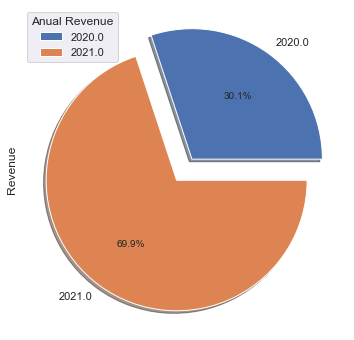

In [216]:
plt.subplots(figsize=(6,6))
anual_revenue.plot.pie(shadow= True, explode=[0.1,0.1], autopct='%1.1f%%')
plt.legend(title='Anual Revenue')
plt.show()

In [217]:
merg3.groupby(by=['Promo', 'Day_Name'])['Revenue'].sum().to_frame()

Revenue
Promo          Day_Name           
No Promo       Friday      70138.0
               Monday      43623.0
               Saturday    52529.0
               Sunday      45984.0
               Thursday   118809.0
               Tuesday     46076.0
               Wednesday   55409.0
Promotion Blue Friday     227588.5
               Monday      46654.0
               Saturday   113962.0
               Sunday      99033.0
               Thursday   153500.5
               Tuesday     87287.0
               Wednesday  101752.0
Promotion Red  Friday      50207.0
               Monday      88111.0
               Saturday    64331.0
               Sunday      96279.0
               Thursday    78995.0
               Tuesday     91792.0
               Wednesday  106007.0

In [218]:
Total_Revenue=merg3.groupby('Promo')['Revenue'].sum()
Total_Revenue


Promo
No Promo          432568.0
Promotion Blue    829777.0
Promotion Red     575722.0
Name: Revenue, dtype: float64

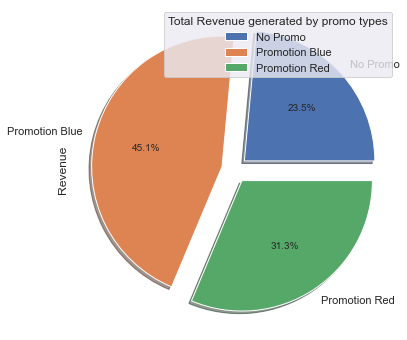

In [219]:
plt.subplots(figsize=(6,6))
Total_Revenue.plot.pie(shadow= True, explode=[0.1,0.1,0.1], autopct='%1.1f%%')
plt.legend(title='Total Revenue generated by promo types')
plt.show()


In [220]:

merg3.groupby('Month Number')['Revenue'].sum().to_frame()


,Revenue
Month Number,
1.0,296331.5
2.0,289456.0
3.0,320325.0
4.0,310577.0
5.0,68724.0
11.0,213342.0
12.0,339311.5


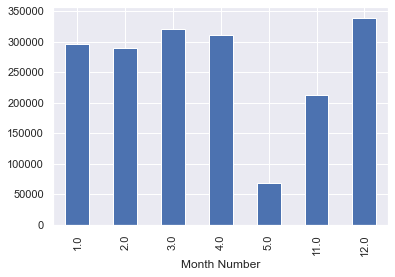

In [221]:

plt.savefig('bar.png')
merg3.groupby('Month Number')['Revenue'].sum().plot.bar('Month Number', 'Revenue')
plt.show()


In [222]:
merg3.groupby('Promo')['Marketing Spend'].sum().to_frame()


,Marketing Spend
Promo,
No Promo,85622.955555
Promotion Blue,97925.296969
Promotion Red,64894.242173


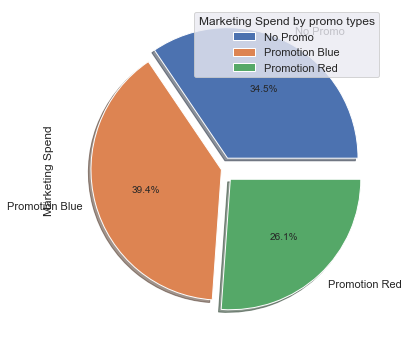

In [223]:
plt.subplots(figsize=(6,6))
merg3.groupby('Promo')['Marketing Spend'].sum().plot.pie(shadow=True, explode=[0.1,0.0,0.1], autopct='%1.1f%%')
plt.legend(title='Marketing Spend by promo types')
plt.show()

In [224]:
##Machine Learning

In [225]:
from sklearn.impute import KNNImputer #library for checking and fixing missing values

In [226]:
from sklearn.preprocessing import OneHotEncoder #for converting categorical variables to numerics
from sklearn.model_selection import train_test_split

In [227]:
enc=OneHotEncoder(handle_unknown='ignore')

In [228]:
encoded=pd.DataFrame(enc.fit_transform(merg3[['Day_Name', 'Promo']]).toarray()) #putting the encoded values to dataframe

In [229]:
encoded

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [230]:
encoded1=merg3.join(encoded) #to join the main dataset with the encoded categoricals

In [231]:
encoded1.drop(['Day_Name', 'Promo'], axis=1, inplace=True)

In [232]:
encoded1

,Date,Week_ID,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,2020-11-09,34.0,11.0,11.0,2020.0,465.0,651.375000,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020-11-10,34.0,11.0,11.0,2020.0,10386.0,1298.250000,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2020-11-11,34.0,11.0,11.0,2020.0,12475.0,1559.375000,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2020-11-12,34.0,11.0,11.0,2020.0,11712.0,1801.750000,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2020-11-13,34.0,11.0,11.0,2020.0,10000.0,2614.500000,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2020-11-14,34.0,11.0,11.0,2020.0,12996.0,1444.000000,1316.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2020-11-15,35.0,11.0,11.0,2020.0,11929.0,1325.444444,1287.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2020-11-16,35.0,11.0,11.0,2020.0,5359.0,1119.111111,1548.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2020-11-17,35.0,11.0,11.0,2020.0,12016.0,1092.363636,1448.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,2020-11-18,35.0,11.0,11.0,2020.0,7441.0,906.700000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [233]:
R_corr=encoded1.corr() #a matrix for the the correlation of the variables
R_corr

,Week_ID,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
Week_ID,1.000000,-0.631898,0.986144,0.807718,-0.045494,-0.107220,-0.026669,-0.006270,-0.008265,-0.006270,0.045602,-0.008265,-0.008265,-0.008265,-0.001453,-0.021379,0.022941
Month Number,-0.631898,1.000000,-0.601891,-0.965465,0.056311,0.116264,0.033913,-0.022469,0.011234,-0.018724,-0.018724,0.018724,0.014979,0.014979,-0.015801,0.001324,0.015667
Month_ID,0.986144,-0.601891,1.000000,0.789160,-0.041908,-0.096467,-0.013159,0.007567,-0.018917,0.016395,0.016395,-0.001261,-0.010089,-0.010089,0.004216,-0.019173,0.014640
Year,0.807718,-0.965465,0.789160,1.000000,-0.057075,-0.120995,-0.030383,0.019749,-0.014812,0.019749,0.019749,-0.014812,-0.014812,-0.014812,0.013528,-0.007273,-0.007273
Revenue,-0.045494,0.056311,-0.041908,-0.057075,1.000000,0.740480,0.578666,0.223141,-0.174804,-0.105767,-0.048130,0.232608,-0.121683,-0.014924,-0.647836,0.638687,0.061674
Marketing Spend,-0.107220,0.116264,-0.096467,-0.120995,0.740480,1.000000,0.845126,0.294848,-0.166547,-0.110966,-0.104548,0.356029,-0.209757,-0.051884,-0.267057,0.422957,-0.136457
Visitors,-0.026669,0.033913,-0.013159,-0.030383,0.578666,0.845126,1.000000,0.271550,-0.142530,-0.246251,-0.140727,0.483937,-0.190679,-0.036779,-0.066771,0.162134,-0.090681
0,-0.006270,-0.022469,0.007567,0.019749,0.223141,0.294848,0.271550,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,0.112941,-0.127672
1,-0.008265,0.011234,-0.018917,-0.014812,-0.174804,-0.166547,-0.142530,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,-0.093299,0.078567
2,-0.006270,-0.018724,0.016395,0.019749,-0.105767,-0.110966,-0.246251,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,0.009821,-0.024552


<AxesSubplot:>

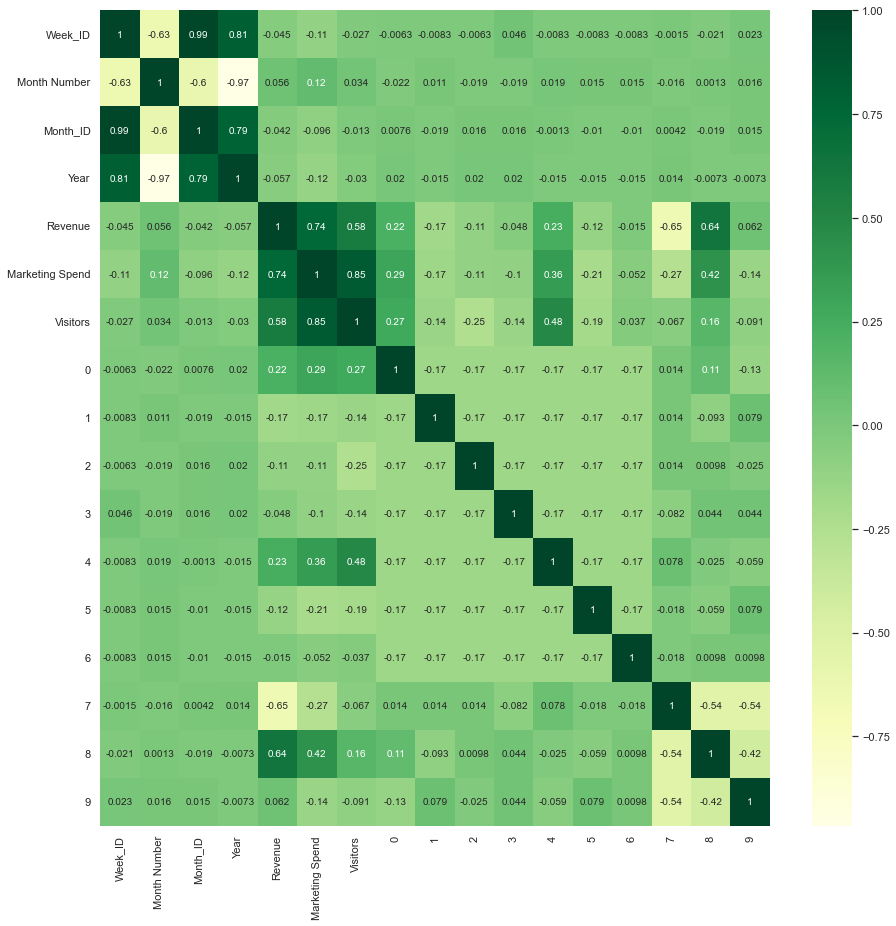

In [234]:
plt.figure(figsize=(15, 15))  #
sns.heatmap(R_corr, cmap='YlGn',annot=True)

<AxesSubplot:>

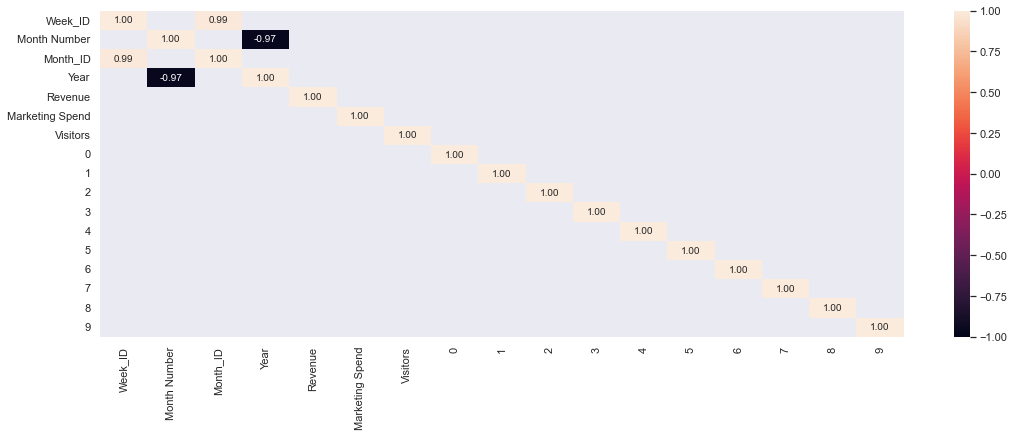

In [235]:
plt.figure(figsize=(18,6))
R_corr1=R_corr[(R_corr>=0.90)|(R_corr<=-0.90)]
sns.heatmap(R_corr1, vmax=1, vmin=-1, annot=True, fmt='0.2f')

In [236]:
encoded1['Revenue'].fillna(encoded1['Revenue'].mean(), inplace=True) #this will fix any missing value in 
#our target variable by replacing the missing value with the mean

In [237]:
encoded1.drop(['Date', 'Week_ID', 'Year'], axis=1, inplace=True)

In [238]:
encoded1.shape

(182, 15)

In [239]:
x=encoded1.drop('Revenue', axis=1) #feature selection of key parameters, separating the target from the predictors
                                   #defined by y and x respectively
y=encoded1['Revenue']

In [240]:
display(x.shape, y.shape)

(182, 14)

(182,)

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)
#splitting our data into train/test where 80% of the data is used to train the model & 20% is used for testing the model

In [242]:
display(y_train.shape, x_train.shape, x_test.shape, y_test.shape)

(145,)

(145, 14)

(37, 14)

(37,)

In [243]:
x_train

,Month Number,Month_ID,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
142,3.0,15.0,1869.625000,2068.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
156,4.0,16.0,1634.700000,1803.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
110,2.0,14.0,1278.900000,1797.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,11.0,11.0,1605.454545,2321.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
63,1.0,13.0,912.500000,1571.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
85,2.0,14.0,1162.090909,1496.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
139,3.0,15.0,1620.777778,1642.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
148,4.0,16.0,882.800000,1244.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
163,4.0,16.0,732.333333,1122.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
147,4.0,16.0,763.272727,1180.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [244]:
y.head(10)

0      465.0
1    10386.0
2    12475.0
3    11712.0
4    10000.0
5    12996.0
6    11929.0
7     5359.0
8    12016.0
9     7441.0
Name: Revenue, dtype: float64

In [245]:
#this is used for handling missing values
imputer = KNNImputer(n_neighbors=2)  
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

C:\Users\nenbon\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\nenbon\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\nenbon\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [246]:
x_train.shape

(145, 14)

In [247]:
cols=['Month Number', 'Month ID', 'Marketing Spend', 'Visitors', 0,1,2,3,4,5,6,7,8,9]

In [248]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.0,15.0,1869.625000,2068.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4.0,16.0,1634.700000,1803.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.0,14.0,1278.900000,1797.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,11.0,11.0,1605.454545,2321.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,13.0,912.500000,1571.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2.0,14.0,1162.090909,1496.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,3.0,15.0,1620.777778,1642.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,4.0,16.0,882.800000,1244.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,4.0,16.0,732.333333,1122.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,4.0,16.0,763.272727,1180.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [249]:
new_x=pd.DataFrame(x_train, columns=cols)

In [250]:
#this sorts the data base on level of importance
from sklearn.feature_selection import mutual_info_regression

mutual_info_regression(new_x,y_train)

imp = pd.DataFrame(mutual_info_regression(new_x,y_train), index=new_x.columns)

imp.columns = ['Importance']

imp.sort_values(by = 'Importance', ascending = False)

,Importance
Marketing Spend,0.579940
Visitors,0.373556
7,0.349694
8,0.235215
9,0.162603
1,0.065867
0,0.059508
3,0.017656
6,0.008294
5,0.007437


In [251]:
imp[imp['Importance']>0.02].sort_values(by='Importance', ascending= False) #this works by trimming the least important variables

,Importance
Marketing Spend,0.579940
Visitors,0.373556
7,0.349694
8,0.235215
9,0.162603
1,0.065867
0,0.059508


In [252]:
new_x['Marketing Spend'].max() #an outcome of the maximum marketing spend 

4535.375

In [253]:
from sklearn.preprocessing import StandardScaler # a library to transform the data to standard scale 
scaler=StandardScaler()  #prepare the scaler

In [254]:
scaler = StandardScaler() # prepare the scaler
scaler.fit(x_train) # this determines the scaling mechanism/function - mean, s.d, ....

# scaling the data - this applies the method using the values from above

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# only the predictors are scaled.

In [255]:
from sklearn.decomposition import PCA #this is required for dimensionality reduction

In [256]:
pca=PCA(n_components=3)
pca.fit(x_train)
x_train=pca.transform(x_train)

pca2=pd.DataFrame(x_train,  columns=['PC1', 'PC2', 'PC3'])
pca2.head()


,PC1,PC2,PC3
0,0.294460,-0.772754,-1.111200
1,0.954513,-0.287168,-1.896736
2,-0.707571,-0.333770,-0.938945
3,1.467523,1.054949,3.250777
4,-1.424547,1.408530,0.664105


In [257]:
x_test=pca.transform(x_test)

In [258]:
x_train

array([[ 0.29445986, -0.77275351, -1.11120003],
       [ 0.9545132 , -0.28716849, -1.89673575],
       [-0.70757081, -0.33376957, -0.93894473],
       [ 1.46752258,  1.05494905,  3.25077698],
       [-1.42454682,  1.40853027,  0.66410517],
       [-0.18938872, -0.37886881, -1.07357913],
       [ 0.65765883, -0.54601372, -1.89309212],
       [-1.84965414, -0.63857359, -0.91983189],
       [-1.57956963,  1.18276127, -0.56787145],
       [-2.01674049, -0.39967586, -0.84926729],
       [ 0.02403774, -1.85143382,  1.01321162],
       [-1.56202863,  1.35097021,  0.20522588],
       [ 2.87181014,  0.50579987, -1.47704755],
       [-0.23070587, -0.14244497, -1.42389854],
       [-0.08980531, -0.28350981, -0.82543162],
       [-0.28925657, -0.5335698 , -2.16401012],
       [ 0.31299973,  0.0510727 , -1.10939994],
       [-0.83732843, -2.07735383,  1.44976799],
       [-0.302817  , -2.51623991,  0.94618429],
       [-1.41733073,  1.74524305, -0.27932155],
       [-1.10486413, -1.86712142,  1.502

In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [260]:
#1.Import the estimator object(model)
from sklearn.linear_model import LinearRegression

#2. Create an instance of the estimator
linear_regression=LinearRegression()

#3. Use the training data to train the estimator
linear_regression.fit(x_train, y_train)

LinearRegression()

In [261]:
y_train_pred1=linear_regression.predict(x_train)  # Train(Already seen)
y_test_pred1=linear_regression.predict(x_test)  ## Test(New)

print('Train r2 score:', r2_score(y_train, y_train_pred1)) #for determing the precision of our model
print('Test r2 score:', r2_score(y_test, y_test_pred1))
print('\n')

print('train_mae:', mean_absolute_error(y_train, y_train_pred1))
print('test mae:', mean_absolute_error(y_test, y_test_pred1))
print('\n')

print('train_msel:', mean_squared_error(y_train, y_train_pred1))
print('test_msel:', mean_squared_error(y_test, y_test_pred1))

Train r2 score: 0.7310017772987004
Test r2 score: 0.730579535729734


train_mae: 2177.499161289084
test mae: 1918.79237183049


train_msel: 8830461.974649997
test_msel: 6727440.025881914


In [262]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [263]:
y_train_pred2=knn.predict(x_train)  # Train(Already seen)
y_test_pred2=knn.predict(x_test)  ## Test(New)

print('Train r2 score:', r2_score(y_train, y_train_pred2))
print('Test r2 score:', r2_score(y_test, y_test_pred2))
print('\n')

print('train_mae:', mean_absolute_error(y_train, y_train_pred2))
print('test mae:', mean_absolute_error(y_test, y_test_pred2))
print('\n')

print('train_msel:', mean_squared_error(y_train, y_train_pred2))
print('test_msel:', mean_squared_error(y_test, y_test_pred2))

Train r2 score: 0.8578557549263506
Test r2 score: 0.8205157532041139


train_mae: 1536.4616350251843
test mae: 1695.4498329790465


train_msel: 4666199.421071965
test_msel: 4481728.992563286


In [264]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(x_train, y_train)

RandomForestRegressor()

In [265]:
y_train_pred3=rd.predict(x_train)  # Train(Already seen)
y_test_pred3=rd.predict(x_test)  ## Test(New)

print('Train r2 score:', r2_score(y_train, y_train_pred3))
print('Test r2 score:', r2_score(y_test, y_test_pred3))
print('\n')

print('train_mae:', mean_absolute_error(y_train, y_train_pred3))
print('test mae:', mean_absolute_error(y_test, y_test_pred3))
print('\n')

print('train_msel:', mean_squared_error(y_train, y_train_pred3))
print('test_msel:', mean_squared_error(y_test, y_test_pred3))

Train r2 score: 0.9646602794921129
Test r2 score: 0.685888528846637


train_mae: 757.4938806664084
test mae: 2352.6203401153957


train_msel: 1160104.53528602
test_msel: 7843376.297896913


In [266]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [267]:
y_train_pred4=dt.predict(x_train)  # Train(Already seen)
y_test_pred4=dt.predict(x_test)  ## Test(New)

print('Train r2 score:', r2_score(y_train, y_train_pred4))
print('Test r2 score:', r2_score(y_test, y_test_pred4))
print('\n')

print('train_mae:', mean_absolute_error(y_train, y_train_pred4))
print('test mae:', mean_absolute_error(y_test, y_test_pred4))
print('\n')

print('train_msel:', mean_squared_error(y_train, y_train_pred4))
print('test_msel:', mean_squared_error(y_test, y_test_pred4))

Train r2 score: 1.0
Test r2 score: 0.37805035325783465


train_mae: 0.0
test mae: 2973.108108108108


train_msel: 0.0
test_msel: 15530108.14864865


In [268]:
##Hyperparameter Tuning

In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
linear_regression.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [271]:
param_grid=({'n_jobs':[-1, 2, 4, 6, 8]},
           { 'n_jobs':[-1, 2, 4, 6, 8]})

grid_search=GridSearchCV(linear_regression, param_grid, cv=5, scoring='r2', return_train_score=True)## cv =cross validation

grid_search=grid_search.fit(x_train, y_train)

In [272]:
grid_search.best_params_

{'n_jobs': -1}

In [273]:
#1. Create an instance of the estimator
linear_regression=LinearRegression(n_jobs=-1,normalize=True)

#2. Use the training data to train the estimator
linear_regression.fit(x_train, y_train)

C:\Users\nenbon\Downloads\New folder\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(n_jobs=-1, normalize=True)

In [274]:
y_train_pred1a=linear_regression.predict(x_train)  # Train(Already seen)
y_test_pred1a=linear_regression.predict(x_test)  ## Test(New)

print('Train r2 score:', r2_score(y_train, y_train_pred1a))
print('Test r2 score:', r2_score(y_test, y_test_pred1a))
print('\n')

print('train_mae:', mean_absolute_error(y_train, y_train_pred1a))
print('test mae:', mean_absolute_error(y_test, y_test_pred1a))
print('\n')

print('train_msel:', mean_squared_error(y_train, y_train_pred1a))
print('test_msel:', mean_squared_error(y_test, y_test_pred1a))

Train r2 score: 0.7310017772987005
Test r2 score: 0.730579535729734


train_mae: 2177.4991612890835
test mae: 1918.7923718304896


train_msel: 8830461.974649996
test_msel: 6727440.0258819135


In [275]:
import pickle
from pickle import dump

In [276]:
# Save the model 
dump(linear_regression, open('lr1_model.pkl', 'wb'))

In [277]:
dump(scaler, open('scaler.pkl', 'wb'))

In [278]:
dump(enc, open('enc.pkl', 'wb'))
dump(imputer, open('imputer.pkl', 'wb'))
dump(pca, open('pca.pkl', 'wb'))



In [279]:
#Load the model fro disk
model=pickle.load(open('lr1_model.pkl','rb'))

In [280]:
scaler=pickle.load(open('scaler.pkl', 'rb'))
enc=pickle.load(open('enc.pkl', 'rb'))
imputer=pickle.load(open('imputer.pkl', 'rb'))
pca=pickle.load(open('pca.pkl', 'rb'))

In [281]:
def predict(p):
    model=pickle.load(open('lr1_model.pkl','rb'))
    scaler=pickle.load(open('scaler.pkl', 'rb'))
    enc=pickle.load(open('enc.pkl', 'rb'))
    imputer=pickle.load(open('imputer.pkl', 'rb'))
    pca=pickle.load(open('pca.pkl', 'rb'))
    
    
    encode=pd.DataFrame(enc.transform(p[['Day_Name', 'Promo']]).toarray())
    new=p.join(encode)
    new.drop(['Day_Name', 'Promo', 'Week_ID','Year'], axis=1, inplace=True)
    new=imputer.transform(new)
    new=scaler.transform(new)
    new=pca.transform(new)
    result=model.predict(new)
    print(f' The Expected Revenue is {round(result.sum(), 2)}')
    

In [282]:
columns=['Week_ID', 'Month_Number', 'Month_ID', 'Year', 'Day_Name', 'Marketing_Spend', 'Promo', 'visitors']

In [288]:
new=pd.DataFrame([[np.NAN,np.NAN,np.NAN,np.NAN,'Friday',5000,'Promotion Red',np.NAN]], columns=columns)
new

,Week_ID,Month_Number,Month_ID,Year,Day_Name,Marketing_Spend,Promo,visitors
0,NaN,NaN,NaN,NaN,Friday,5000,Promotion Red,NaN


In [289]:
#result of expected revenue, suppose we have tuesday, marketing spend of 5000 and promotion red campaign only.
predict(new)

 The Expected Revenue is 21180.38


C:\Users\nenbon\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [375]:
x.shape

(182, 14)

In [376]:
merg3

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250000,Promotion Red,1455.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375000,Promotion Blue,1520.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750000,No Promo,1726.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500000,No Promo,2134.0
5,2020-11-14,34.0,11.0,11.0,2020.0,Saturday,12996.0,1444.000000,Promotion Blue,1316.0
6,2020-11-15,35.0,11.0,11.0,2020.0,Sunday,11929.0,1325.444444,Promotion Blue,1287.0
7,2020-11-16,35.0,11.0,11.0,2020.0,Monday,5359.0,1119.111111,No Promo,1548.0
8,2020-11-17,35.0,11.0,11.0,2020.0,Tuesday,12016.0,1092.363636,Promotion Blue,1448.0
9,2020-11-18,35.0,11.0,11.0,2020.0,Wednesday,7441.0,906.700000,No Promo,NaN


In [377]:
#to get a copy of the main dataset
new_merg3=merg3.copy()

In [378]:
#to drop date and revenue columns respectively
new_merg3.drop(['Date','Revenue'],axis=1,inplace=True)

In [379]:
#making promotion blue the only variables for promo columns
new_merg3['Promo']='Promotion Blue'

In [380]:
new_merg3.head()

,Week_ID,Month Number,Month_ID,Year,Day_Name,Marketing Spend,Promo,Visitors
0,34.0,11.0,11.0,2020.0,Monday,651.375,Promotion Blue,707.0
1,34.0,11.0,11.0,2020.0,Tuesday,1298.250,Promotion Blue,1455.0
2,34.0,11.0,11.0,2020.0,Wednesday,1559.375,Promotion Blue,1520.0
3,34.0,11.0,11.0,2020.0,Thursday,1801.750,Promotion Blue,1726.0
4,34.0,11.0,11.0,2020.0,Friday,2614.500,Promotion Blue,2134.0


In [381]:
#this gives future prediction of the revenue given that promo depends on revenue only
predict(new_merg3)

 The Expected Revenue is 2531321.71


C:\Users\nenbon\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
